<img src="https://raw.githubusercontent.com/alan-barzilay/NLPortugues/master/imagens/logo_nlportugues.png"   width="150" align="right">


# Lista 2 - NN & Backpropagation



_________________________________________

Antes de começar o exercício,  não se esqueça de instalar todos os pacotes necessários para a sua execução.  

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
%matplotlib inline
tf.__version__

'2.8.0'

## Perceptron

O perceptron é uma "rede neural" de um só neurônio.  No nosso caso, temos a rede mais simples possível, com uma só entrada e uma só saída, sem ativação.

Temos 100 dados que serão usados para treinar 300 épocas do percéptron.

Vamos utilizar o modelo percéptron para aprender uma simples regressão linear, o objetivo é faze-lo aprender uma simples equação linear e tambem se acostumar com a sintaxe e funcionamento do TensorFlow


In [3]:
def f1(x):
    '''
    Funcao a ser aprendida
    '''
    return 5 + 10*x

In [ ]:
xs = np.linspace(0,10,100)  # gera 100 valores no intervalo [0.10]
ys = f1(xs)                 # computa o valor de f1 nestes 100 valores
print(len(xs), "xs=", xs)
print(len(ys), "ys=", ys)

In [ ]:
#Definindo, compilando e treinando nosso modelo
model = tf.keras.Sequential([
    keras.Input(shape=(1,)),
    keras.layers.Dense(units=1),
])

model.compile(optimizer="sgd", loss="mean_squared_error")
model.fit(xs,ys,epochs=300)

In [ ]:
model.summary()

In [ ]:
print("prediction: "+ str(model.predict([17]))+"      real value: " + str(f1(17)))

In [ ]:
val = np.linspace(0,10,63)
model.evaluate(x=val, y=f1(val))

A função `evaluate` retorna o "custo" (loss) da avaliação, definido na compilação.  Nesse caso, o valor reportado é o erro quadrático médio (MSE). 

## Aprendendo uma função não linear

In [9]:
def f2(x):
    '''
    Funcao não linear a ser aprendida
    '''
    return (x**2 + x*3 + 4)/200

In [10]:
x = np.linspace(0,10,100)
y = f2(x)

# <font color='blue'>Questão 1 </font>
Defina as camadas para esta rede neural e treine seu modelo, note que a saída unitária _não deve_ ter função de ativação (por que?).

<font color='green'>RESPOSTA: </font>
A saída unitária não deve ter função de ativação porque ESTE É UM *PROBLEMA DE REGRESSÃO*

In [ ]:
model = tf.keras.Sequential([    
    keras.Input(shape=(1,)),
    #Seu código aqui
    keras.layers.Dense(units=1),    # Adiciona uma camada densa (totalmente conectada) com 1 neurônio E SEM FUNÇÃO DE ATIVAÇÃO
])

model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x,y,epochs=400)

In [ ]:
model.summary()

In [13]:
x_val = np.linspace(0,10,63)
y_val = f2(x_val)

In [ ]:
model.evaluate(x=x_val,y=y_val)

____________________________
# <font color='blue'>Questão 2 </font>

O que acontece se você muda as funções de ativação? Teste algumas diferentes e descreva seus resultados, em especial a tangente hiperbólica



**<font color='green'> Resposta: </font>**<br>

Ao mudar a função de ativação em um camada de rede neural, o funcionamento dos neurônios dessa camada são alterados, mudando a forma de processamento e transmissão de informação para as camadas seguintes. Cada função de ativação possui suas próprias características, o que influencia diretamente o aprendizado e o desempenho final do modelo. 
Por exemplo:
<ul>
    <li><b>ReLU (Rectified Linear Unit)</b> -> Passa apenas valores positivos, substitui valores negativos por 0. Útil para resolução de problemas de vanish gradient.</li>
    <li><b>Sigmoid</b> -> Comprime valores para o intervalo (0 - 1). útil para resolução de problemas de classificação binária.</li>
    <li><b>Tanh (Tangente Hiperbólica)</b> -> Comprime valores para o intervalo (-1 - 1). Útil para centralizar os dados ao redor de 0.</li>
</ul>

Testes com a Função de Ativação <b>TANH (Tangente Hiperbólica)</b>, no código abaixo:

In [ ]:
# Testes com a Função de Ativação TANH (Tangente Hiperbólica):
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split

def f2(x):
    # função não-linear a ser aprendida
    return (x**2 + x*3 + 4)/200

x = np.linspace(0, 10, 100)       # gera 100 valores no intervalo [0-10]
y = f2(x)                         # joga na função e computa o valor de f2 nestes 100 valores

print(len(x), "\nValores de x =\n", x)
print(len(y), "\nValores de y =\n", y)

# Definindo, compilando e treinando o modelo com a função de ativação 'tanh'
model = tf.keras.Sequential(
    [
        keras.Input(shape=(1,)),                            # Define a entrada do modelo com uma forma de vetor de 1 dimensão
        keras.layers.Dense(units=64, activation='tanh'),    # USANDO FUNÇÃO DE ATIVAÇÃO TANH
        keras.layers.Dense(units=1)                         # Camada de saída com 1 neurônio, sem função de ativação
    ]
)

model.compile(
    optimizer="adam",                               # (Adaptive Moment Estimation)
    loss="mean_squared_error"                       # função de perda comumente usada em problemas de regressão
)

model.fit(x, y, epochs=400, verbose=0)              # treinando o modelo com os dados de x e y e 400 épocas

model.summary()

# Prediction do Modelo e VALOR REAL
prediction = model.predict([17])
real_value = f2(17)
print(f"Function: tanh\nPrediction: {prediction[0][0]}\nReal Value: {real_value}") 

# Avaliação do modelo
x_val = np.linspace(0, 10, 63)
y_val = f2(x_val)

loss = model.evaluate(x=x_val, y=y_val, verbose=0)
print(f"Loss: {loss}\n")


O que acontece se você mudar a função de otimização? Teste diferentes funções e descreva seus resultados, em especial as funções SDG e RMSprop

**<font color='green'> Resposta: </font>**<br>

Os otimizadores são fundamentais para o treinamento eficaz de modelos de aprendizado de máquina, garantindo que os parâmetros do modelo sejam ajustados corretamente, de maneira a minimizar o erro de predição. Cada otimizador tem suas próprias características e é mais adequado para diferentes tipos de problemas e dados.
Por exemplo:
<ul>
    <li><b>SGD (Stochastic Gradient Descent)</b> -> Atualiza os parâmetros para cada exemplo de treinamento. É simples e eficiente, mas pode ser instável e se prender em mínimos locais.</li>
    <li><b>RMSprop (Root Mean Square Propagation)</b> -> Adapta a taxa de aprendizado para cada parâmetro com base na média móvel dos quadrados dos gradientes. Estabiliza e acelera a convergência.</li>
    <li><b>Adam (Adaptive Moment Estimation)</b> -> Combina as vantagens do AdaGrad e RMSprop, mantém uma média móvel dos gradientes e dos quadrados dos gradientes. É rápido, eficiente e popular para muitos tipos de problemas.</li>
</ul>

Neste primeiro exemplo, mostrarei o caso da função de otimização, usando <b>SDG (Stochastic Gradient Descent)</b>, no código abaixo:

In [ ]:
# Testes com a Função de Otimização SDG (Stochastic Gradient Descent):
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split

def f2(x):
    # função não-linear a ser aprendida
    return (x**2 + x*3 + 4)/200

x = np.linspace(0, 10, 100)       # gera 100 valores no intervalo [0-10]
y = f2(x)                         # joga na função e computa o valor de f2 nestes 100 valores

print(len(x), "\nValores de x =\n", x)
print(len(y), "\nValores de y =\n", y)

# Definindo o modelo com a função de ativação 'tanh' e otimizador SGD
model = tf.keras.Sequential(
    [
        keras.Input(shape=(1,)),                    # Define a entrada do modelo com uma forma de vetor de 1 dimensão
        keras.layers.Dense(units=64, activation='tanh'),  # Camada densa com função de ativação 'tanh'
        keras.layers.Dense(units=1)                 # Camada de saída com 1 neurônio, sem função de ativação
    ]
)

model.compile(
    optimizer="sgd",                                # OTIMIZADOR SGD
    loss="mean_squared_error"                       # Função de perda comumente usada em problemas de regressão
)

model.fit(x, y, epochs=400, verbose=0)              # Treinando o modelo com os dados de x e y e 400 épocas

model.summary()

# Prediction do Modelo e VALOR REAL
prediction = model.predict([17])
real_value = f2(17)
print(f"Optimizer: SGD\nPrediction: {prediction[0][0]}\nReal Value: {real_value}") 

# Avaliação do modelo
x_val = np.linspace(0, 10, 63)
y_val = f2(x_val)

loss = model.evaluate(x=x_val, y=y_val, verbose=0)
print(f"Loss: {loss}\n")


Neste segundo exemplo, mostrarei o caso da função de otimização, usando <b>RMSprop (Root Mean Square Propagation)</b>, no código abaixo:

In [ ]:
# Testes com a Função de Otimização RMSprop (Root Mean Square Propagation):
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split

tf.__version__

def f2(x):
    # função não-linear a ser aprendida
    return (x**2 + x*3 + 4)/200

x = np.linspace(0, 10, 100)       # gera 100 valores no intervalo [0-10]
y = f2(x)                         # joga na função e computa o valor de f2 nestes 100 valores

print(len(x), "\nValores de x =\n", x)
print(len(y), "\nValores de y =\n", y)

# Definindo o modelo com a função de ativação 'tanh' e otimizador RMSprop
model = tf.keras.Sequential(
    [
        keras.Input(shape=(1,)),                    # Define a entrada do modelo com uma forma de vetor de 1 dimensão
        keras.layers.Dense(units=64, activation='tanh'),  # Camada densa com função de ativação 'tanh'
        keras.layers.Dense(units=1)                 # Camada de saída com 1 neurônio, sem função de ativação
    ]
)

model.compile(
    optimizer="rmsprop",                            # Otimizador RMSprop
    loss="mean_squared_error"                       # Função de perda comumente usada em problemas de regressão
)

model.fit(x, y, epochs=400, verbose=0)              # Treinando o modelo com os dados de x e y e 400 épocas

model.summary()

# Prediction do Modelo e VALOR REAL
prediction = model.predict([17])
real_value = f2(17)
print(f"Optimizer: RMSprop\nPrediction: {prediction[0][0]}\nReal Value: {real_value}") 

# Avaliação do modelo
x_val = np.linspace(0, 10, 63)
y_val = f2(x_val)

loss = model.evaluate(x=x_val, y=y_val, verbose=0)
print(f"Loss: {loss}\n")


Volte a primeira parte desse notebook e troque a função de ativação da rede de uma camada (pérceptron) de sdg para adam, o que acontece?

**<font color='green'> Resposta: </font>**<br>

Após a troca das funções, temos esses resultados:

SDG ->  Prediction: [[175.01314]]
        Real Value: 175
        loss: 1.9457e-05

ADAM -> Prediction: [[28.294687]]
        Real Value: 175
        loss: 2710.9272

Podemos perceber a GRANDE diferença entre os resultados finais. Conclui-se que a função SDG se mostra mais apropriada para a resolução deste problema.

A avaliação de performance que realizamos foi apenas para pontos contidos no mesmo intervalo que o conjunto de treino, ou seja, foi apenas uma interpolação. Sem alterar sua rede repita o teste realizando uma extrapolação, com pontos fora do intervalo [0;10] e descreva seus resultados. O que aconteceu com a performance?

In [ ]:
# CÓDIGO USANDO EXTRAPOLAÇÃO, FUNÇÃO DE ATIVAÇÃO TANH E FUNÇÃO DE OTIMIZAÇÃO 
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split

tf.__version__

def f2(x):
    # função não-linear a ser aprendida
    return (x**2 + x*3 + 4)/200

x = np.linspace(0, 10, 100)       # gera 100 valores no intervalo [0-10]
y = f2(x)                         # joga na função e computa o valor de f2 nestes 100 valores

print(len(x), "\nValores de x =\n", x)
print(len(y), "\nValores de y =\n", y)

# Definindo o modelo com a função de ativação 'tanh' e otimizador SGD
model = tf.keras.Sequential(
    [
        keras.Input(shape=(1,)),                            # Define a entrada do modelo com uma forma de vetor de 1 dimensão
        keras.layers.Dense(units=64, activation='tanh'),    # Camada densa com função de ativação 'tanh'
        keras.layers.Dense(units=1)                         # Camada de saída com 1 neurônio, sem função de ativação
    ]
)

model.compile(
    optimizer="sgd",                                # Otimizador SGD
    loss="mean_squared_error"                       # Função de perda comumente usada em problemas de regressão
)

model.fit(x, y, epochs=400, verbose=0)              # Treinando o modelo com os dados de x e y e 400 épocas

model.summary()

# Prediction do Modelo e VALOR REAL dentro do intervalo de treino
prediction = model.predict([17])
real_value = f2(17)
print(f"Optimizer: SGD\nPrediction (in interval): {prediction[0][0]}\nReal Value (in interval): {real_value}")

# Avaliação do modelo dentro do intervalo de treino
x_val = np.linspace(0, 10, 63)
y_val = f2(x_val)

loss = model.evaluate(x=x_val, y=y_val, verbose=0)
print(f"Loss (in interval): {loss}\n")

# Avaliação do modelo fora do intervalo de treino
x_extrap = np.linspace(10, 20, 50)  # Valores de 10 a 20
y_extrap = f2(x_extrap)

extrap_loss = model.evaluate(x=x_extrap, y=y_extrap, verbose=0)
print(f"Loss (extrapolation): {extrap_loss}")

# Prediction do Modelo e VALOR REAL fora do intervalo de treino
prediction_extrap = model.predict([25])
real_value_extrap = f2(25)
print(f"Prediction (extrapolation): {prediction_extrap[0][0]}\nReal Value (extrapolation): {real_value_extrap}")


# Prevendo se vai chover na Austrália

Os próximos exercícios são, em grande parte, uma tradução e adaptação para o português brasileiro do tutorial intitulado [Build Your First Neural Network with Pytorch](https://curiousily.com/posts/build-your-first-neural-network-with-pytorch/)
 entretanto algumas adaptações foram realizadas, tanto no texto, quanto no código, em relação à versão original para utilizar a biblioteca TensorFlow. 

Aqui você aprenderá como implementar, treinar e utilizar uma Rede Neural *Feed-Foward* simples para uma tarefa de classificação binária.

Para tal, utilizaremos o pacote [TensorFlow 2.0](www.tensorflow.org) que é, atualmente, uma das principais ferramentas para a implementação de modelos neurais viáveis.

A tarefa que usaremos para fins de exemplo será a de prever se choverá ou não numa cidade australiana amanhã, utilizando dados meteorológicos mensurados na mesma cidade no dia de hoje. A redução dessa tarefa de previsão a uma classificação binária é, evidentemente, uma grande simplificação do problema real de previsão meteorológica, mas como veremos, ainda pode apresentar resultados interessantes, além do caráter didático.



As informações que utilizaremos para treinar nosso modelo para a tarefa de previsão de chuvas estão contidas num conjunto que reúne dados meteorológicos de diversas cidades australianas. Esse conjunto de dados foi curado e disponibilizado através do [Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) por [Joe Young](https://www.kaggle.com/jsphyg).



In [ ]:
!mkdir data

In [ ]:
# Baixando os dados:
!curl https://raw.githubusercontent.com/alan-barzilay/NLPortugues/master/Semana%2002/data/weatherAUS.csv --output 'data/weatherAUS.csv'

Os dados estão no formato `.csv` e, com eles em mãos, o primeiro passo é carregá-los em um *data-frame*, usando a função [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) do *pandas*.


Com os dados carregados, é possível averiguar que eles são constituídos por 142193 entradas, cada uma contando com 24 variáveis distintas. É possível notar, também, que existem entradas para as quais nem todas as variáveis estão  instanciadas. Além disso, nem todos os valores estão nos formatos que gostaríamos que estivessem para serem processados. 

Isso é normal. Dados reais são cheios de falhas e problemas, e exigem trabalho e entendimento para serem utilizados da maneira correta. Por isso, é necessário realizar um **pré-processamento** para adequar os dados, antes de os passarmos para o modelo.

O primeiro passo é escolher quais das variáveis meteorológicas nos interessam. No nosso caso, queremos prever se choverá ou não amanhã, então `RainTomorrow` será nossa variável alvo. Para prevê-la usaremos as variáveis  `Rainfall`, `Humidity3pm`, `Pressure9am` e `RainToday`, que serão nossas *features*. 



Em seguida, iniciamos o pré-processamento, propriamente dito.

As variáveis `RainToday` e `RainTomorrow` possuem dois valores possíveis, *Yes* e *No*. Adeque esses valores, convertendo-os para $1$ e $0$, respectivamente.




A seguir, remova todas as entradas que não tenham instanciado os valores de todas as variáveis de interesse com a função [`dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html), pois essas entradas são inúteis para treinar nosso modelo.



Com os dados pré-processados, é possível, agora, plotar as distribuições das variáveis de interesse para poder entender melhor como essas distribuições funcionam. Esse tipo de trabalho é muito importante na implementação real de redes neurais, conhecer os dados é fundamental para tirar o maior proveito do seu modelo e entender verdadeiramente seus resultados.




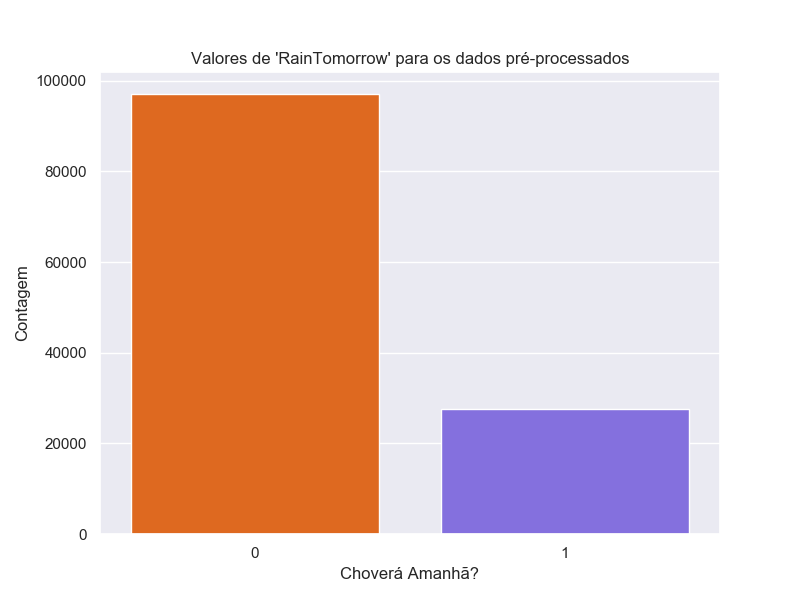



Dentre todas as distribuições das variáveis de interesse, a que mais nos concerne é a da variável alvo, `RainTomorrow`, representada na figura acima.


Essa distribuição nos revela um grande desbalanço entre os dois valores possíveis dessa variável, que constituirão as duas classes do nosso problema de classificação. Esse é um dado importante, pois pode influenciar significativamente a capacidade preditiva do modelo treinado. 

Existem maneiras de se lidar com o desbalanceamento dos dados, mas nesse tutorial utilizaremos os dados dessa forma. Isso significa que o *baseline* para a performance do nosso modelo deve ser $78\%$, isso porque, se um modelo chutasse que amanhã não irá chover, todas as vezes, ele obteria uma performance dessa ordem e, como esperamos gerar um modelo mais "inteligente" que isso, esperamos também que a a nossa performance seja superior a essa.

Todo o código referente a esse pré-processamento deve ser escrito pelo próprio aluno seguindo o esqueleto das funções presentes no notebook. Para agilizar a exploração dos dados nós já fornecemos a implementação da função `visualize_data()` que plota visualizações para as distribuições das variáveis de interesse.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

def visualize_data(data):
    """Gera graficos das distribuicoes das features"""

    ibm_pltt = ['#648FFF', '#785EF0', '#DC267F',
                '#FE6100', '#FFB000']  # Paleta colorblind-friendly

    # RainToday:
    sns.set()
    sns.set_palette(sns.color_palette([ibm_pltt[2], ibm_pltt[0]]))
    sns.countplot(x=data.RainToday)
    plt.xlabel('Choveu Hoje?')
    plt.ylabel('Contagem')
    plt.title("Valores de 'RainToday' para os dados pré-processados")
    plt.show()

    # RainTomorrow:
    sns.set()
    sns.set_palette(sns.color_palette([ibm_pltt[3], ibm_pltt[1]]))
    sns.countplot(x=data.RainTomorrow)
    plt.xlabel('Choverá Amanhã?')
    plt.ylabel('Contagem')
    plt.title("Valores de 'RainTomorrow' para os dados pré-processados")
    plt.show()

    # Humidity3pm:
    sns.set()
    sns.displot(data.Humidity3pm, color=ibm_pltt[0], stat='density', kde=True)
    plt.xlabel('Umidade às 3PM')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Humidity3pm' para os dados pré-processados")
    plt.show()

    # Pressure9am:
    sns.set()
    sns.displot(data.Pressure9am, color=ibm_pltt[4], stat='density', kde=True)
    plt.xlabel('Pressão atmosférica às 9AM')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Pressure9amm' para os dados pré-processados")
    plt.show()

    # Rainfall:
    sns.set()
    sns.histplot(data.Rainfall, color=ibm_pltt[1], bins=500, kde=False)
    plt.xlim(0, 10)
    plt.xlabel('Pluviosidade')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Rainfall' para os dados pré-processados")
    plt.show()

    return


## Pré processamento dos dados
Já definimos uma função basica para lhe ajudar a explorar os dados, você precisará escrever uma função para carregar os dados, uma de pré-processamento e outra para fazer a separação em teste e treino.

# <font color='blue'>Questão 3 </font>
Complete as funções aqui descritas seguindo a assinatura sugerida

Para separar em treino e teste, de uma olhada na função [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do Scikit-Learn

<font color='green'>Resposta: </font>

Aqui está a resposta, com o código e output:


In [8]:
import pandas as pd
import numpy as np

def load_data(data_path='data/weatherAUS.csv')-> pd.DataFrame:
    """Funcao que importa dados de um arquivo csv, usando pandas"""
    #Seu código aqui
    usecols = ["Rainfall", "Humidity3pm", "Pressure9am", "RainToday", "RainTomorrow"]
    raw_data = pd.read_csv(data_path, usecols=usecols)
    return raw_data

def pre_processing(raw_data:pd.DataFrame)-> pd.DataFrame:
    """Funcao que filtra e limpa os dados meteorologicos para o treinamento"""
    #Seu código aqui
    raw_data['RainToday'] = raw_data['RainToday'].map({'Yes': 1, 'No': 0})
    raw_data['RainTomorrow'] = raw_data['RainTomorrow'].map({'Yes': 1, 'No': 0})
    processed_data = raw_data.dropna()    
    return processed_data


def split_data(data:pd.DataFrame, val_size= 0.2)-> np.array:
    """Funcao que separa seus dados em teste e treino conforme a proporcao val_size"""
    #Seu código aqui
    x_values = data.drop("RainTomorrow", axis=1)
    y_values = data["RainTomorrow"]
    x_train, x_val, y_train, y_val = train_test_split(x_values, y_values, random_state=random_state, test_size=test_size)    
    return x_train, x_val, y_train, y_val


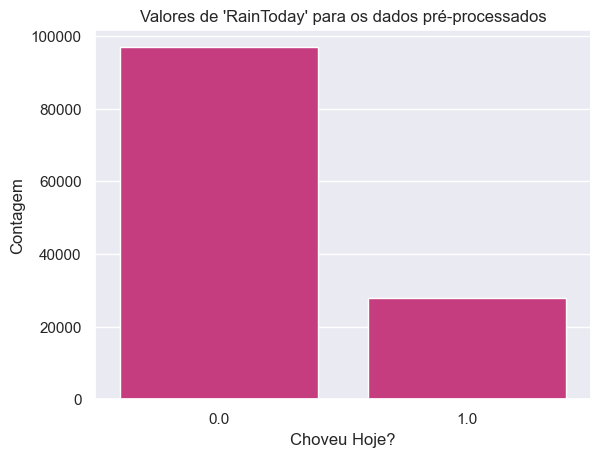

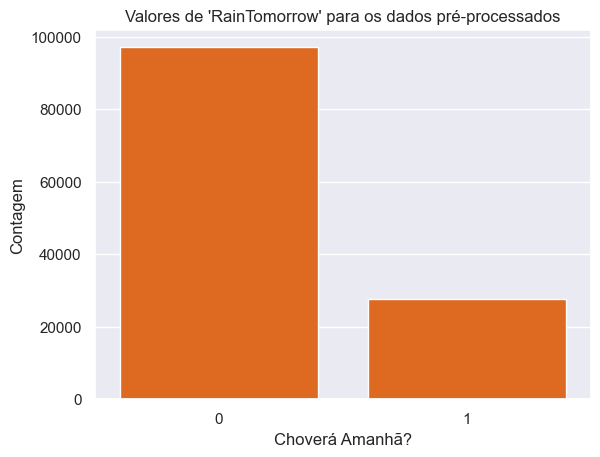

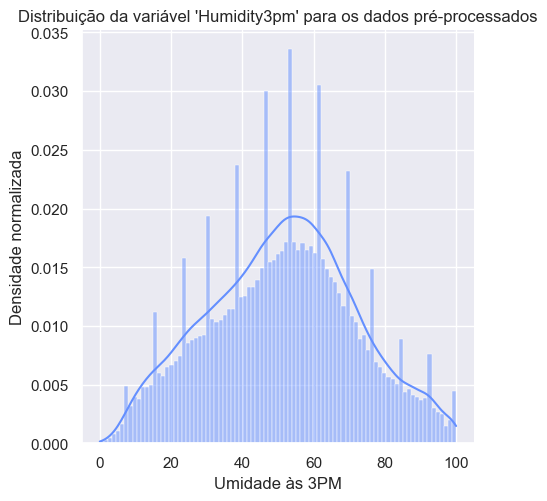

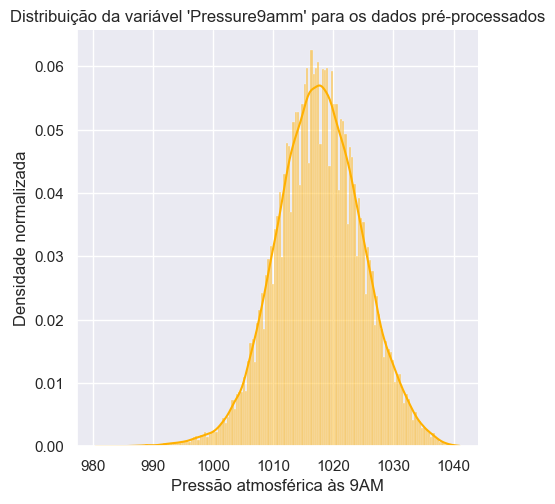

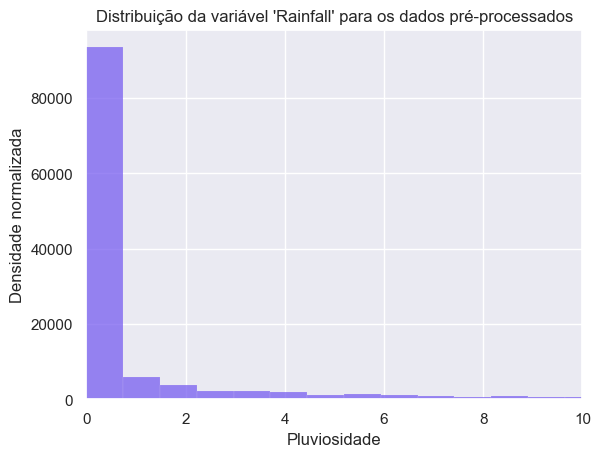

In [9]:
data_path = "data\weatherAUS.csv"
random_state = 42
test_size = 0.2

df = load_data()
df = pre_processing(df)
visualize_data(df)
x_train, x_val, y_train, y_val = split_data(df,)

# <font color='blue'>Questão 4 </font>
Agora que você ja ganhou uma familiaridade com a API Keras, escreva sozinho do começo ao fim um modelo que ira dizer se amanhã vai chover ou não e avalie sua performance.


In [3]:
# CÓDIGO COMPLETO, COM O MODELO:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split

def visualize_data(data):
    """Gera graficos das distribuicoes das features"""

    ibm_pltt = ['#648FFF', '#785EF0', '#DC267F',
                '#FE6100', '#FFB000']  # Paleta colorblind-friendly

    # RainToday:
    sns.set()
    sns.set_palette(sns.color_palette([ibm_pltt[2], ibm_pltt[0]]))
    sns.countplot(x=data.RainToday)
    plt.xlabel('Choveu Hoje?')
    plt.ylabel('Contagem')
    plt.title("Valores de 'RainToday' para os dados pré-processados")
    plt.show()

    # RainTomorrow:
    sns.set()
    sns.set_palette(sns.color_palette([ibm_pltt[3], ibm_pltt[1]]))
    sns.countplot(x=data.RainTomorrow)
    plt.xlabel('Choverá Amanhã?')
    plt.ylabel('Contagem')
    plt.title("Valores de 'RainTomorrow' para os dados pré-processados")
    plt.show()

    # Humidity3pm:
    sns.set()
    sns.displot(data.Humidity3pm, color=ibm_pltt[0], stat='density', kde=True)
    plt.xlabel('Umidade às 3PM')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Humidity3pm' para os dados pré-processados")
    plt.show()

    # Pressure9am:
    sns.set()
    sns.displot(data.Pressure9am, color=ibm_pltt[4], stat='density', kde=True)
    plt.xlabel('Pressão atmosférica às 9AM')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Pressure9amm' para os dados pré-processados")
    plt.show()

    # Rainfall:
    sns.set()
    sns.histplot(data.Rainfall, color=ibm_pltt[1], bins=500, kde=False)
    plt.xlim(0, 10)
    plt.xlabel('Pluviosidade')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Rainfall' para os dados pré-processados")
    plt.show()

    return

def load_data(data_path='data/weatherAUS.csv')-> pd.DataFrame:
    """Funcao que importa dados de um arquivo csv, usando pandas"""
    usecols = ["Rainfall", "Humidity3pm", "Pressure9am", "RainToday", "RainTomorrow"]
    raw_data = pd.read_csv(data_path, usecols=usecols)
    return raw_data


def pre_processing(raw_data:pd.DataFrame)-> pd.DataFrame:
    """Funcao que filtra e limpa os dados meteorologicos para o treinamento"""
    raw_data['RainToday'] = raw_data['RainToday'].map({'Yes': 1, 'No': 0})
    raw_data['RainTomorrow'] = raw_data['RainTomorrow'].map({'Yes': 1, 'No': 0})
    processed_data = raw_data.dropna()

    return processed_data


def split_data(data:pd.DataFrame, val_size= 0.2)-> np.array:
    """Funcao que separa seus dados em teste e treino conforme a proporcao val_size"""
    x_values = data.drop("RainTomorrow", axis=1)
    y_values = data["RainTomorrow"]
    x_train, x_val, y_train, y_val = train_test_split(x_values, y_values, random_state=random_state, test_size=test_size)

    return x_train, x_val, y_train, y_val

random_state = 42
test_size = 0.2

df = load_data()
df = pre_processing(df)
x_train, x_val, y_train, y_val = split_data(df,)

# Criando o modelo
model = tf.keras.Sequential([
    keras.Input(shape=(4,)),                            # Número de features no x_train
    keras.layers.Dense(units=10, activation='relu'),    # Camada oculta com 64 unidades e função de ativação ReLU
    keras.layers.Dense(units=10, activation='relu'),    # Camada oculta com 32 unidades e função de ativação ReLU
    keras.layers.Dense(units=10, activation='relu'),    # Camada oculta com 32 unidades e função de ativação ReLU
    keras.layers.Dense(units=10, activation='relu'),    # Camada oculta com 32 unidades e função de ativação ReLU
    keras.layers.Dense(units=1, activation='sigmoid')   # Camada de saída com uma unidade e função de ativação sigmoid
])

# Compilando o modelo para classificação binária
model.compile(
    optimizer="adam",
    loss="binary_crossentropy", 
    metrics=["accuracy"])

model.fit(x_train.values, y_train.values, epochs=10)        # treinamento do modelo

model.summary()

model.evaluate(x=x_val, y=y_val)


Epoch 1/10
3118/3118 [==============================] - 13s 4ms/step - loss: 0.4275 - accuracy: 0.8270
Epoch 2/10
3118/3118 [==============================] - 11s 4ms/step - loss: 0.4049 - accuracy: 0.8308
Epoch 3/10
3118/3118 [==============================] - 13s 4ms/step - loss: 0.4029 - accuracy: 0.8321
Epoch 4/10
3118/3118 [==============================] - 9s 3ms/step - loss: 0.4019 - accuracy: 0.8326
Epoch 5/10
3118/3118 [==============================] - 9s 3ms/step - loss: 0.4015 - accuracy: 0.8328
Epoch 6/10
3118/3118 [==============================] - 8s 3ms/step - loss: 0.4008 - accuracy: 0.8328
Epoch 7/10
3118/3118 [==============================] - 7s 2ms/step - loss: 0.3998 - accuracy: 0.8338
Epoch 8/10
3118/3118 [==============================] - 8s 3ms/step - loss: 0.3993 - accuracy: 0.8346
Epoch 9/10
3118/3118 [==============================] - 7s 2ms/step - loss: 0.3997 - accuracy: 0.8337
Epoch 10/10
3118/3118 [==============================] - 7s 2ms/step - loss: 0.

[0.4016921818256378, 0.8313817977905273]